<a href="https://colab.research.google.com/github/JennyMyy/Data-analytiikka/blob/main/Aikasarja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OSA 1

In [1]:
# Asennetaan ensin yfinance-kirjasto

!pip install yfinance

In [3]:
# Haetaan pandas -kirjasto
import pandas as pd

# Tuodaan myös tarvittava grafiikka sekä yfinancen
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Valitaan myös tyyli
sns.set_style('whitegrid')

# Haetaan aineisto
> Haetaan kahden pörssiosakkeen kurssihistoria Yahoon Finance -palvelusta osoitteesta https://finance.yahoo.com/.

In [4]:
nordea = yf.download('NDA-FI.HE', start = '2018-01-01')
aktia = yf.download('Aktia.He', start = '2018-01-01')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
# Katsotaan miltä aieistot näyttävät

nordea

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,10.150,10.190,10.080,10.130,6.283244,1260289
2018-01-03,10.140,10.180,10.070,10.150,6.295648,1560190
2018-01-04,10.170,10.360,10.170,10.310,6.394890,1761646
2018-01-05,10.340,10.340,10.190,10.300,6.388687,1531630
2018-01-08,10.340,10.340,10.200,10.240,6.351471,1670973
...,...,...,...,...,...,...
2024-02-23,11.146,11.182,11.064,11.176,11.176000,4479814
2024-02-26,11.198,11.202,11.106,11.184,11.184000,4711571
2024-02-27,11.184,11.228,11.124,11.224,11.224000,3347814


In [6]:
aktia

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,9.11,9.28,9.08,9.13,6.030499,132556
2018-01-03,9.19,9.22,9.13,9.19,6.070129,48758
2018-01-04,9.20,9.35,9.20,9.34,6.169207,45625
2018-01-05,9.36,9.40,9.35,9.37,6.189023,36959
2018-01-08,9.40,9.47,9.37,9.46,6.248468,43533
...,...,...,...,...,...,...
2024-02-23,9.05,9.07,9.02,9.04,9.040000,41247
2024-02-26,9.04,9.08,9.01,9.08,9.080000,47497
2024-02-27,9.08,9.15,9.06,9.12,9.120000,40945


Piiretään kurssikehykset 2018 vuodesta tähän päivään asti. Viivakuviolla havainnoillistetaan osakekurssien arvojen muutokset.

Text(0.5, 0.98, 'Nordean ja Aktian kurssihistoria')

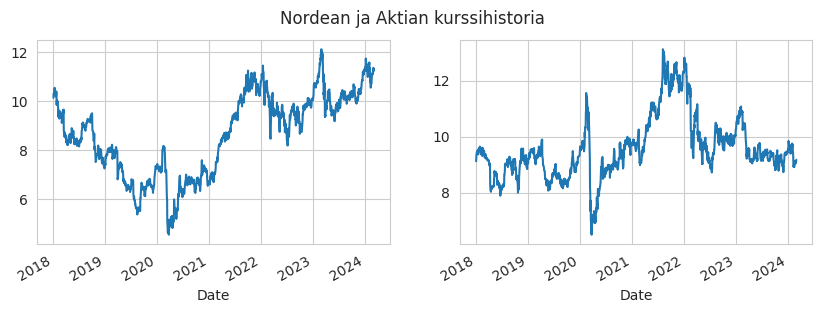

In [12]:
# Luodaan ensin 2 tyhjää pohjaa.
fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (10, 3))

# Laitetaan tyhjiin pohjiin valittu aineisto
nordea['Close'].plot(ax=axs[0])
aktia['Close'].plot(ax=axs[1])

# Otsikoidaan
fig.suptitle('Nordean ja Aktian kurssihistoria')

Molemmissa nähtävissä 2020 vuoden alussa alas menevä piikki, kun COVID-19 saapui Suomeen.

Text(0.5, 0.98, 'Nordean ja Aktian kurssihistoria 2024 vuoden alusta')

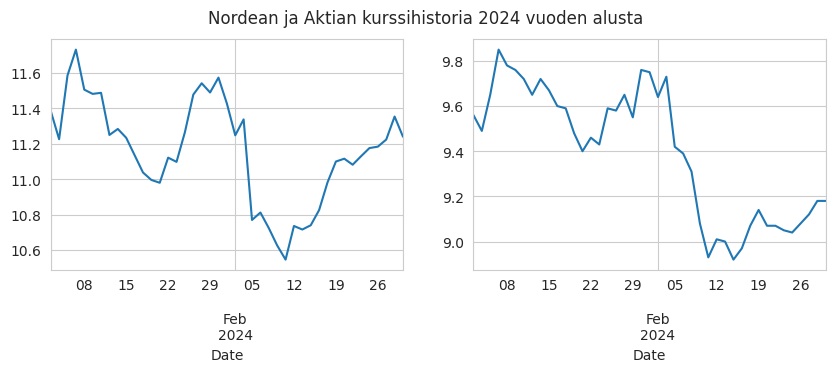

In [13]:
# Katsotaan kurssien kehitys tämän vuoden alusta
fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (10, 3))

nordea['Close']['2024':].plot(ax=axs[0])
aktia['Close']['2024':].plot(ax=axs[1])

fig.suptitle('Nordean ja Aktian kurssihistoria 2024 vuoden alusta')

Text(0.5, 0.98, 'Nordean ja Aktian kurssihistoria 2018-2020-01')

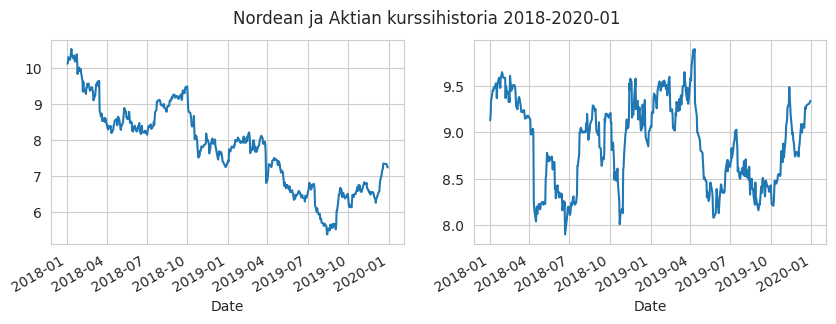

In [15]:
# Katsotaan kurssien kehitys ennen Covid-19
fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (10, 3))

nordea['Close']['2018':'2019'].plot(ax=axs[0])
aktia['Close']['2018':'2019'].plot(ax=axs[1])

fig.suptitle('Nordean ja Aktian kurssihistoria 2018-2020-01')

Selkiytettään enempi Aggeroinnin avulla käyttäen **resample** -funktiota.

Text(0.5, 0.98, 'Nordean ja Aktion kurssihistoria kuukausitasolla')

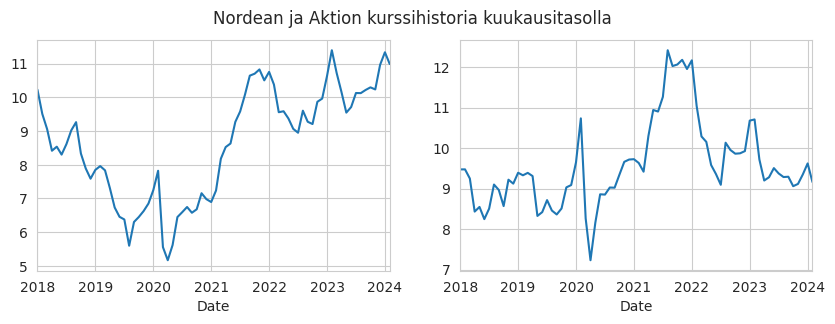

In [16]:
# Aggeroidaan kuukausitasolla
fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (10, 3))

nordea['Close'].resample('M').mean().plot(ax=axs[0])
aktia['Close'].resample('M').mean().plot(ax=axs[1])

fig.suptitle('Nordean ja Aktion kurssihistoria kuukausitasolla')

Katsotaan vielä osakkeiden vaihdon määrät (kpl) vuosineljänneksittäin

Text(0.5, 0.98, 'Nordean ja Aktion kurssihistoria kuukausitasolla')

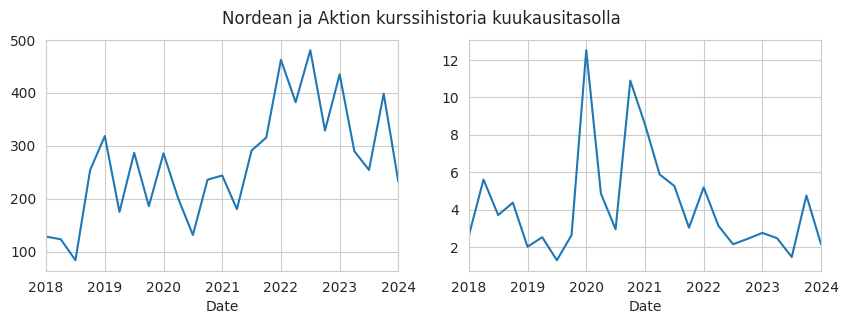

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (10, 3))

# Selkiytetään viivakuviota jakamalla 1milj. jolloin on helpompi vertailla
(nordea['Volume']/1000000).resample('Q').sum().plot(ax=axs[0])
(aktia['Volume']/1000000).resample('Q').sum().plot(ax=axs[1])

fig.suptitle('Nordean ja Aktion kurssihistoria kuukausitasolla')

Nordealla voluumi ollut suurempaa kuin Aktialla.

## Liukuvat keskiarvot
> Käytetään **rolling** -funktiota tasoittamaan aikasarjojen satunnaisia piikkejä.

<Axes: xlabel='Date'>

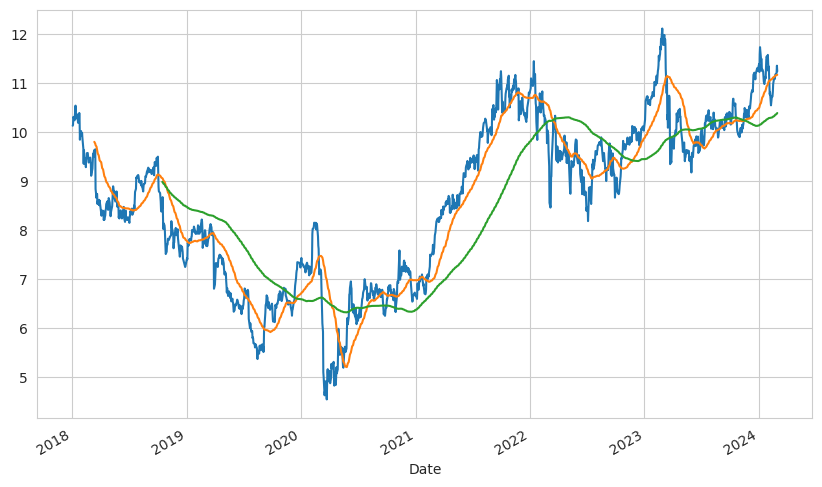

In [22]:
# Nordean päätöskurssien hinnat
nordea['Close'].plot(figsize= (10, 6))

# Nordean päätöskurssien 50 päivän liukuvat keskiarvot
nordea['Close'].rolling(50).mean().plot()

# Nordean päätöskurssien 200 päivän liukuvat keskiarvot
nordea['Close'].rolling(200).mean().plot()

<Axes: xlabel='Date'>

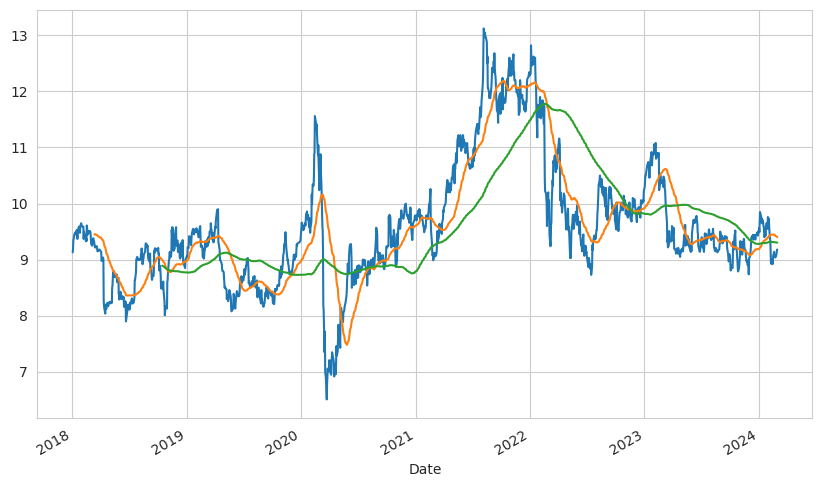

In [26]:
# Aktian päätöskurssien hinnat
aktia['Close'].plot(figsize= (10,6))

# Aktian päätöskurssien 50 päivän liukuvat keskiarvot
aktia['Close'].rolling(50).mean().plot()

# Aktian päätöskurssien 200 päivän liukuvat keskiarvot
aktia['Close'].rolling(200).mean().plot()

## Nordean ja Aktian muutosprosentit